In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans
import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:
data = pd.read_csv("Iris.csv")
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
species_list = list(data["Species"].unique())
#print(len(species_list))
X1=data.loc[data["Species"] == species_list[0]]
X2=data.loc[data["Species"] == species_list[1]]
X3=data.loc[data["Species"] == species_list[2]]


Text(0, 0.5, 'Sepal Width')

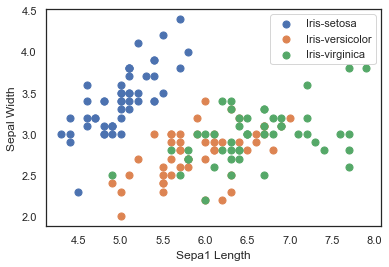

In [4]:

Y11=X1[["SepalLengthCm","SepalWidthCm"]]
#print(Y1)
Y21=X2[["SepalLengthCm","SepalWidthCm"]]
#print(Y2)
Y31=X3[["SepalLengthCm","SepalWidthCm"]]
#print(Y3)

figsize=(20,10)
plt.scatter(Y11["SepalLengthCm"],Y11["SepalWidthCm"],s=50)
plt.scatter(Y21["SepalLengthCm"],Y21["SepalWidthCm"],s=50)
plt.scatter(Y31["SepalLengthCm"],Y31["SepalWidthCm"],s=50)

plt.legend(species_list)
plt.xlabel('Sepa1 Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

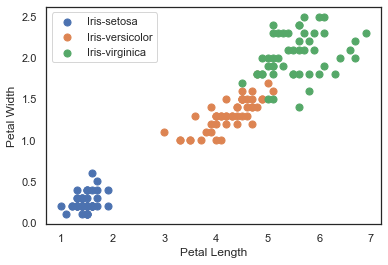

In [5]:
Y12=X1[["PetalLengthCm","PetalWidthCm"]]
#print(Y1)
Y22=X2[["PetalLengthCm","PetalWidthCm"]]
#print(Y2)
Y32=X3[["PetalLengthCm","PetalWidthCm"]]
#print(Y3)

figsize=(20,10)
plt.scatter(Y12["PetalLengthCm"],Y12["PetalWidthCm"],s=50)
plt.scatter(Y22["PetalLengthCm"],Y22["PetalWidthCm"],s=50)
plt.scatter(Y32["PetalLengthCm"],Y32["PetalWidthCm"],s=50)

plt.legend(species_list)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [6]:
########### PCA ############

# split data into features (X) and labels (y)
X = data.iloc[:,1:5]
y = data.iloc[:,-1]
print(X.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [7]:
#Feature Scaling

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [8]:
#PCA

pca = decomposition.PCA(n_components = 2)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)

In [10]:
dfpc = pd.DataFrame(X_pca_array, columns=['PC1', 'PC2'])
dfpc['class'] = y
dfpc.head()

,PC1,PC2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


<Figure size 1000x1000 with 0 Axes>

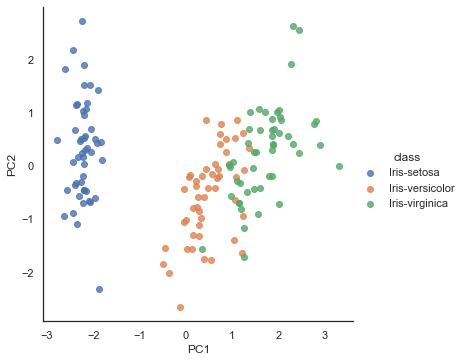

In [11]:
plt.figure(1, figsize=(10,10), dpi=100)
plt.clf()
sns.lmplot(data=dfpc, x="PC1", y="PC2", fit_reg=False, hue='class')
plt.show()

In [13]:
################## K Means ###################

#finding optimal k with elbow method.
def elbow(a):
    Error =[]


    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(a)
        Error.append(kmeans.inertia_)

    print(Error)
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()

[574.8058521688918, 198.70683592637363, 116.10924021401533, 89.79391195436648, 66.38079893034632, 57.10289981921169, 47.90172909470787, 40.03637152572617, 32.382942729870955, 28.380364197770373]


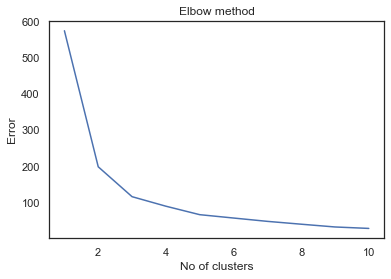

In [14]:
elbow(X_pca_array)

In [12]:
# K = 5 
# K = 3
# elbow says k=5 but there are 3 classifications of data originally species wise.
# sp, taking K = 3

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(X_pca_array)
print(y_kmeans)
kmeans.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


array([[-2.22019328,  0.29222482],
       [ 0.56713803, -0.8076751 ],
       [ 1.72236912,  0.59990509]])

In [13]:
dfpc['clusterKMeans'] = y_kmeans

In [14]:
dfpc.loc[21]

PC1                -2.204645
PC2                 0.952457
class            Iris-setosa
clusterKMeans              0
Name: 21, dtype: object

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


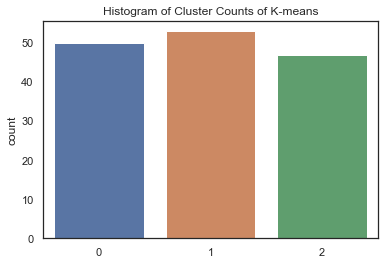

In [16]:
plt.ylabel('Count')
plt.title('Histogram of Cluster Counts of K-means')
sns.countplot(y_kmeans)
plt.show()

In [17]:
data['X'] = X_pca_array[:,[0]]
data['Y'] = X_pca_array[:,[1]]
data['cluster'] = y_kmeans

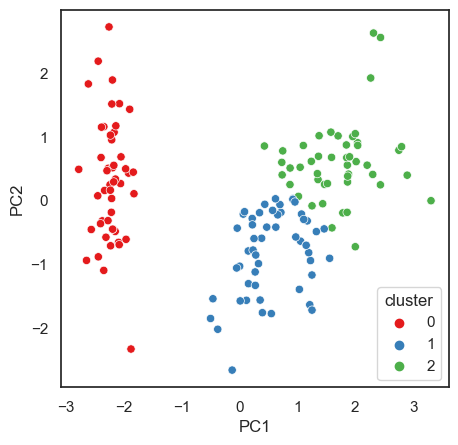

In [25]:
plt.figure(1, figsize=(5,5), dpi=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
sns.scatterplot(x='X', y='Y', hue='cluster', legend="full", palette="Set1", data=data)
plt.show()